<a href="https://colab.research.google.com/github/ahcamachod/1922-clustering-kmeans-dbscan-meanshift/blob/aula-4/clustering_kmeans_dbscan_meanshift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering: KMeans, DBSCAN y Mean Shift** 

En este notebook estaremos ejecutando diversos métodos para la clusterización de datos.

Utilizaremos una base de datos disponible en Kaggle llamada *Customer Personality Analysis*.

El dataset utilizado se puede acceder en el siguiente link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis 

## Aula 1

### 1.2 Importando los datos

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

datos = pd.read_csv('/content/drive/MyDrive/clustering/marketing_campaign.csv', sep='\t')
datos.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
datos.shape

(2240, 29)

In [4]:
columnas = {'Year_Birth':'Ano_Nacimiento', 'Education':'Escolaridad', 'Marital_Status':'Estado_Civil', 
            'Income':'Renta_Anual', 'Kidhome':'CtNinos','Teenhome':'CtAdolescentes', 'Dt_Customer':'Primera_Compra', 
            'Recency':'Recencia', 'MntWines':'GastoVinos', 'MntFruits':'GastoFrutas','MntMeatProducts':'GastoCarnes', 
            'MntFishProducts':'GastoPescado', 'MntSweetProducts':'GastoGolosinas','MntGoldProds':'GastoOro', 
            'NumDealsPurchases':'NumComprasConDescuento', 'NumWebPurchases':'NumComprasOnline',
            'NumCatalogPurchases':'NumComprasCatalogo', 'NumStorePurchases':'NumComprasTienda', 
            'NumWebVisitsMonth':'NumVisitasOnlineMes','Z_CostContact':'CostoContacto','Z_Revenue':'Ingresos','AcceptedCmp3':'AceptaCmp3', 'AcceptedCmp4':'AceptaCmp4', 
            'AcceptedCmp5':'AceptaCmp5', 'AcceptedCmp1':'AceptaCmp1', 'AcceptedCmp2':'AceptaCmp2', 
            'Complain':'Quejas','Response':'AceptaCmpActual'}

In [5]:
datos = datos.rename(columns=columnas)
datos.head()

,ID,Ano_Nacimiento,Escolaridad,Estado_Civil,Renta_Anual,CtNinos,CtAdolescentes,Primera_Compra,Recencia,GastoVinos,...,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,Quejas,CostoContacto,Ingresos,AceptaCmpActual
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**Clientes**

*ID*: Identificación única del cliente.

*Ano_Nacimiento*: Año de nacimiento del cliente.

*Escolaridad*: Nivel educativo del cliente.

*Estado_Civil*: Estado civil del cliente.

*Renta_Anual*: Renta anual del cliente.

*CtNinos*: Número de niños en el hogar.

*CtAdolescentes*: Número de adolescentes en el hogar.

*Primera_Compra*: Fecha en que compró por primera vez

*Recencia*: Hace cuántos días realizó la última compra.

*Quejas*: 1 si el cliente se quejó en los últimos 2 años, 0 en otro caso.

**Productos**

*GastoVinos*: Gasto en vinos en los últimos 2 años.

*GastoFrutas*: Gasto en frutas en los últimos 2 años.

*GastoCarnes*: Gasto en carne en los últimos 2 años.

*GastoPescado*: Gasto en pescado en los últimos 2 años.

*GastoGolosinas*: Gasto en golosinas en los últimos 2 años.

*GastoOro*: Gasto en productos de oro en los últimos 2 años.

**Promociones**

*NumComprasConDescuento*: Número de compras con descuento.

*AceptaCmp1*: 1 si el cliente aceptó la oferta en la primera campaña, 0 en otro caso.

*AceptaCmp2*: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en otro caso.

*AceptaCmp3*: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en otro caso.

*AceptaCmp4*: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en otro caso.

*AceptaCmp5*: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en otro caso.

*AceptaCmpActual*: 1 si el cliente aceptó la oferta en la última campaña, 0 en otro caso.

**Compras**

*NumComprasOnline*: Número de compras realizadas en la página web.

*NumComprasCatalogo*: Número de compras realizadas a través del catálogo.

*NumComprasTienda*: Número de compras realizadas en la tienda.

*NumVisitasOnlineMes*: Número de visitas realizadas a la página web.

### 1.3 Analizando y transformando los datos

In [6]:
datos.isna().sum()

ID                         0
Ano_Nacimiento             0
Escolaridad                0
Estado_Civil               0
Renta_Anual               24
CtNinos                    0
CtAdolescentes             0
Primera_Compra             0
Recencia                   0
GastoVinos                 0
GastoFrutas                0
GastoCarnes                0
GastoPescado               0
GastoGolosinas             0
GastoOro                   0
NumComprasConDescuento     0
NumComprasOnline           0
NumComprasCatalogo         0
NumComprasTienda           0
NumVisitasOnlineMes        0
AceptaCmp3                 0
AceptaCmp4                 0
AceptaCmp5                 0
AceptaCmp1                 0
AceptaCmp2                 0
Quejas                     0
CostoContacto              0
Ingresos                   0
AceptaCmpActual            0
dtype: int64

In [7]:
datos.dropna(axis=0, inplace=True)
datos.isna().sum()

ID                        0
Ano_Nacimiento            0
Escolaridad               0
Estado_Civil              0
Renta_Anual               0
CtNinos                   0
CtAdolescentes            0
Primera_Compra            0
Recencia                  0
GastoVinos                0
GastoFrutas               0
GastoCarnes               0
GastoPescado              0
GastoGolosinas            0
GastoOro                  0
NumComprasConDescuento    0
NumComprasOnline          0
NumComprasCatalogo        0
NumComprasTienda          0
NumVisitasOnlineMes       0
AceptaCmp3                0
AceptaCmp4                0
AceptaCmp5                0
AceptaCmp1                0
AceptaCmp2                0
Quejas                    0
CostoContacto             0
Ingresos                  0
AceptaCmpActual           0
dtype: int64

In [8]:
matriz_corr = datos.corr()
matriz_corr

,ID,Ano_Nacimiento,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,...,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,Quejas,CostoContacto,Ingresos,AceptaCmpActual
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,...,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,0.034154,NaN,NaN,-0.021491
Ano_Nacimiento,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,...,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,-0.030407,NaN,NaN,0.023692
Renta_Anual,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
CtNinos,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,...,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,0.040978,NaN,NaN,-0.077909
CtAdolescentes,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,...,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,0.003307,NaN,NaN,-0.153901
Recencia,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,...,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,NaN,NaN,-0.199766
GastoVinos,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,...,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,NaN,NaN,0.246299
GastoFrutas,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,...,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,NaN,NaN,0.122443
GastoCarnes,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,...,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,NaN,NaN,0.237746
GastoPescado,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,...,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,NaN,NaN,0.108145


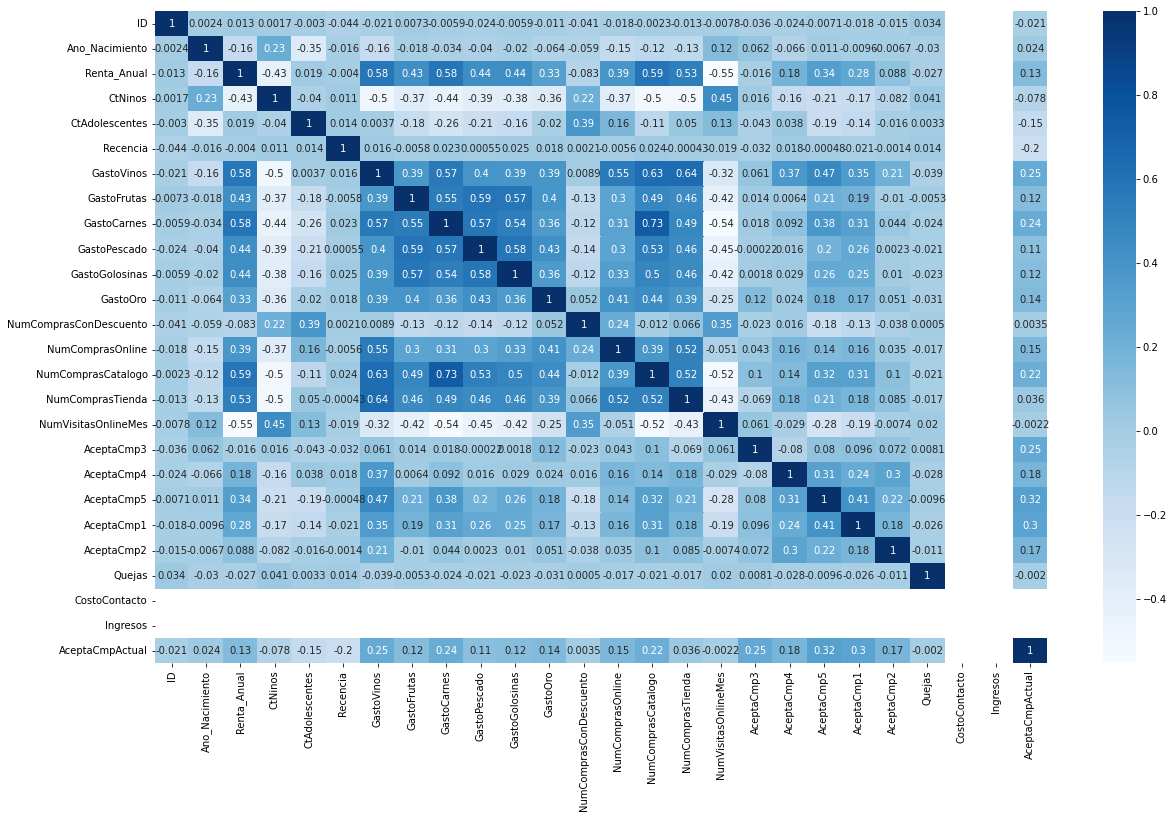

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
grafico_corr = sns.heatmap(matriz_corr,cmap='Blues',annot=True)

In [10]:
datos.ID.value_counts()

5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: ID, Length: 2216, dtype: int64

### 1.4 Selección de atributos 

In [11]:
X = datos.drop(columns=['ID','CostoContacto','Ingresos','Primera_Compra','Quejas',
                        'Escolaridad','Estado_Civil',], axis=1)
X.head()

,Ano_Nacimiento,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,...,NumComprasOnline,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual
0,1957,58138.0,0,0,58,635,88,546,172,88,...,8,10,4,7,0,0,0,0,0,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,1,2,5,0,0,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,8,2,10,4,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,2,0,4,6,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,5,3,6,5,0,0,0,0,0,0


In [12]:
from datetime import datetime

ano_actual = datetime.today().year
X['Edad'] = ano_actual - datos.Ano_Nacimiento
X.head()

,Ano_Nacimiento,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,1957,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,0,0,0,0,1,65
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,68
2,1965,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,57
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,38
4,1981,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,41


(0.0, 150000.0)

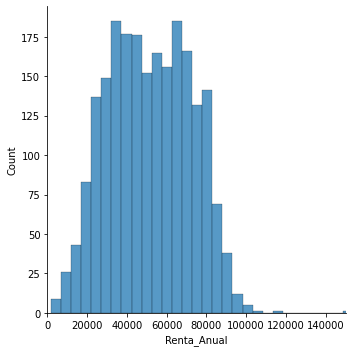

In [13]:
sns.displot(datos.Renta_Anual)
plt.xlim(0,150000)

### 1.5 Normalización

In [14]:
X.describe()

,Ano_Nacimiento,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.150271,53.179603
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.357417,11.985554
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000


In [15]:
X.drop(columns=['Ano_Nacimiento'], axis=1, inplace=True)
X.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,58138.0,0,0,58,635,88,546,172,88,88,...,10,4,7,0,0,0,0,0,1,65
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,2,5,0,0,0,0,0,0,68
2,71613.0,0,0,26,426,49,127,111,21,42,...,2,10,4,0,0,0,0,0,0,57
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,4,6,0,0,0,0,0,0,38
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,6,5,0,0,0,0,0,0,41


In [16]:
atributos = X.columns

X_norm = X.copy()

for atributo in atributos:
  X_norm[atributo] = (X[atributo]-min(X[atributo]))/(max(X[atributo]-min(X[atributo])))

X_norm.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,...,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,1.0,0.378641
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,...,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.407767
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,...,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.300971
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,...,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.116505
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,...,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.145631


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)
X_norm.head()
                         

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,...,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,1.0,0.378641
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,...,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.407767
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,...,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.300971
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,...,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.116505
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,...,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.145631


## Aula 2 

### 2.2 KMeans

In [18]:
from sklearn.cluster import KMeans

agrupador = KMeans(n_clusters=3)
agrupador.fit(X_norm)

KMeans(n_clusters=3)

In [19]:
agrupador.labels_

array([2, 0, 1, ..., 1, 1, 2], dtype=int32)

In [20]:
datos['Cluster_KMeans'] = agrupador.labels_
datos.Cluster_KMeans.value_counts()

0    1085
1     798
2     333
Name: Cluster_KMeans, dtype: int64

In [21]:
agrupador = KMeans(n_clusters=4)
agrupador.fit(X_norm)
datos['Cluster_KMeans'] = agrupador.labels_
datos.Cluster_KMeans.value_counts()

1    1037
3     774
2     237
0     168
Name: Cluster_KMeans, dtype: int64

### 2.3 Gráficando los clusters en 2D

In [22]:
import warnings
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

agrupador = KMeans(n_clusters=3)
agrupador.fit(X_norm)
labels = agrupador.labels_

figura = go.Figure()
figura.add_trace(go.Scatter(x=datos['Renta_Anual'],
                            y=datos['GastoVinos'],
                            mode='markers', marker=dict(color=labels.astype(np.float)),
                            text=labels))

figura.show()

In [23]:
agrupador = KMeans(n_clusters=4)
agrupador.fit(X_norm)
labels = agrupador.labels_

figura = go.Figure()
figura.add_trace(go.Scatter(x=datos['Renta_Anual'],
                            y=datos['GastoVinos'],
                            mode='markers', marker=dict(color=labels.astype(np.float)),
                            text=labels))
figura.show()

### 2.4 Gráficando los clusters en 3D

In [24]:
agrupador = KMeans(n_clusters=4)
agrupador.fit(X_norm)
labels = agrupador.labels_

figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos['Renta_Anual'].loc[datos['Renta_Anual']<=110000],
                            y=datos['GastoVinos'],
                            z=X['Edad'],
                            mode='markers', marker=dict(color=labels.astype(np.float)),
                            text=labels))
figura.show()

In [25]:
figura.update_layout(scene=dict(xaxis_title='Renta Anual',
                                yaxis_title='Gasto en Vinos',
                                zaxis_title='Edad del cliente'))
figura.show()

### 2.5 Visualizando los centroides

In [26]:
centroides = pd.DataFrame(agrupador.cluster_centers_, columns= X.columns)
centroides.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.096056,0.033592,0.309432,0.518258,0.329899,0.233961,0.153031,0.260862,0.180119,0.215992,...,0.154854,0.657921,0.206654,0.038760,0.091731,-1.526557e-16,0.056848,0.006460,-3.330669e-16,0.291551
1,0.074264,0.232068,0.191983,0.327494,0.231884,0.152323,0.127191,0.162765,0.109511,0.165477,...,0.120856,0.409607,0.305907,0.253165,0.071730,-2.775558e-17,0.088608,0.016878,1.000000e+00,0.263775
2,0.120801,0.023810,0.071429,0.500361,0.586367,0.284697,0.270576,0.299733,0.250250,0.241618,...,0.215986,0.635531,0.150595,0.142857,0.386905,9.642857e-01,0.440476,0.113095,5.714286e-01,0.262598
3,0.054112,0.390068,0.253616,0.515220,0.042457,0.027461,0.019752,0.030076,0.020446,0.054507,...,0.025658,0.265930,0.319769,0.047252,0.010608,8.326673e-17,0.002893,0.001929,-3.330669e-16,0.243458


In [27]:
inverso = scaler.inverse_transform(centroides)
centros = pd.DataFrame(inverso, columns=X.columns)
centros.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,65601.007752,0.067183,0.618863,51.307494,492.538760,46.558140,263.978036,67.563307,47.191214,69.333333,...,4.335917,8.552972,4.133075,0.038760,0.091731,-1.526557e-16,0.056848,0.006460,-3.330669e-16,56.029716
1,51111.046414,0.464135,0.383966,32.421941,346.202532,30.312236,219.405063,42.156118,28.691983,53.118143,...,3.383966,5.324895,6.118143,0.253165,0.071730,-2.775558e-17,0.088608,0.016878,1.000000e+00,53.168776
2,82055.250000,0.047619,0.142857,49.535714,875.446429,56.654762,466.744048,77.630952,65.565476,77.559524,...,6.047619,8.261905,3.011905,0.142857,0.386905,9.642857e-01,0.440476,0.113095,5.714286e-01,53.047619
3,37710.828351,0.780135,0.507232,51.006750,63.387657,5.464802,34.071360,7.789778,5.356798,17.496625,...,0.718419,3.457088,6.395371,0.047252,0.010608,8.326673e-17,0.002893,0.001929,-3.330669e-16,51.076181


In [28]:
figura.add_trace(go.Scatter3d(x=centros['Renta_Anual'],
                              y=centros['GastoVinos'],
                              z=centros['Edad'],
                              mode='markers',
                              marker=dict(color='red'),
                              text= [0,1,2,3]))
figura.show()

## Aula 3

### 3.2 DBSCAN

In [29]:
from sklearn.cluster import DBSCAN

agrupador = DBSCAN(eps=0.1, min_samples=200, metric='euclidean')
agrupador.fit(X_norm)
datos['Cluster_DBSCAN'] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

-1    2216
Name: Cluster_DBSCAN, dtype: int64

In [30]:
agrupador = DBSCAN(eps=2.1, min_samples=200, metric='euclidean')
agrupador.fit(X_norm)
datos['Cluster_DBSCAN'] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

0    2216
Name: Cluster_DBSCAN, dtype: int64

In [31]:
agrupador = DBSCAN(eps=1.1, min_samples=200, metric='euclidean')
agrupador.fit(X_norm)
datos['Cluster_DBSCAN'] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

 0    1961
-1     255
Name: Cluster_DBSCAN, dtype: int64

### 3.3 Ajuste de hiperparámetros y visualización

In [32]:
rango = [i for i in np.arange(0.1,1.5,0.05)]
rango

[0.1,
 0.15000000000000002,
 0.20000000000000004,
 0.25000000000000006,
 0.30000000000000004,
 0.3500000000000001,
 0.40000000000000013,
 0.45000000000000007,
 0.5000000000000001,
 0.5500000000000002,
 0.6000000000000002,
 0.6500000000000001,
 0.7000000000000002,
 0.7500000000000002,
 0.8000000000000002,
 0.8500000000000002,
 0.9000000000000002,
 0.9500000000000003,
 1.0000000000000004,
 1.0500000000000003,
 1.1000000000000005,
 1.1500000000000004,
 1.2000000000000004,
 1.2500000000000004,
 1.3000000000000005,
 1.3500000000000005,
 1.4000000000000006,
 1.4500000000000006]

In [33]:
for e in rango:
  agrupador = DBSCAN(eps=e, min_samples=200, metric='euclidean')
  agrupador.fit(X_norm)
  datos['Cluster_DBSCAN'] = agrupador.labels_
  print(f"El epsilon es: {e}, y hay {len(datos.Cluster_DBSCAN.value_counts())} clusters.")  

El epsilon es: 0.1, y hay 1 clusters.
El epsilon es: 0.15000000000000002, y hay 1 clusters.
El epsilon es: 0.20000000000000004, y hay 1 clusters.
El epsilon es: 0.25000000000000006, y hay 1 clusters.
El epsilon es: 0.30000000000000004, y hay 1 clusters.
El epsilon es: 0.3500000000000001, y hay 2 clusters.
El epsilon es: 0.40000000000000013, y hay 2 clusters.
El epsilon es: 0.45000000000000007, y hay 3 clusters.
El epsilon es: 0.5000000000000001, y hay 3 clusters.
El epsilon es: 0.5500000000000002, y hay 2 clusters.
El epsilon es: 0.6000000000000002, y hay 2 clusters.
El epsilon es: 0.6500000000000001, y hay 2 clusters.
El epsilon es: 0.7000000000000002, y hay 2 clusters.
El epsilon es: 0.7500000000000002, y hay 2 clusters.
El epsilon es: 0.8000000000000002, y hay 2 clusters.
El epsilon es: 0.8500000000000002, y hay 2 clusters.
El epsilon es: 0.9000000000000002, y hay 2 clusters.
El epsilon es: 0.9500000000000003, y hay 2 clusters.
El epsilon es: 1.0000000000000004, y hay 2 clusters.
El

In [34]:
rango = [i for i in np.arange(0.4,0.6,0.005)]

for e in rango:
  agrupador = DBSCAN(eps=e, min_samples=200, metric='euclidean')
  agrupador.fit(X_norm)
  datos['Cluster_DBSCAN'] = agrupador.labels_
  print(f"El epsilon es: {e}, y hay {len(datos.Cluster_DBSCAN.value_counts())} clusters.")

El epsilon es: 0.4, y hay 2 clusters.
El epsilon es: 0.405, y hay 2 clusters.
El epsilon es: 0.41000000000000003, y hay 2 clusters.
El epsilon es: 0.41500000000000004, y hay 2 clusters.
El epsilon es: 0.42000000000000004, y hay 2 clusters.
El epsilon es: 0.42500000000000004, y hay 2 clusters.
El epsilon es: 0.43000000000000005, y hay 2 clusters.
El epsilon es: 0.43500000000000005, y hay 3 clusters.
El epsilon es: 0.44000000000000006, y hay 3 clusters.
El epsilon es: 0.44500000000000006, y hay 3 clusters.
El epsilon es: 0.45000000000000007, y hay 3 clusters.
El epsilon es: 0.45500000000000007, y hay 3 clusters.
El epsilon es: 0.4600000000000001, y hay 3 clusters.
El epsilon es: 0.4650000000000001, y hay 3 clusters.
El epsilon es: 0.4700000000000001, y hay 3 clusters.
El epsilon es: 0.4750000000000001, y hay 3 clusters.
El epsilon es: 0.4800000000000001, y hay 3 clusters.
El epsilon es: 0.4850000000000001, y hay 3 clusters.
El epsilon es: 0.4900000000000001, y hay 3 clusters.
El epsilon 

In [35]:
agrupador = DBSCAN(eps=0.435, min_samples=200, metric='euclidean')
agrupador.fit(X_norm)
datos['Cluster_DBSCAN'] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

-1    1647
 0     367
 1     202
Name: Cluster_DBSCAN, dtype: int64

In [36]:
agrupador = DBSCAN(eps=0.5, min_samples=200, metric='euclidean')
agrupador.fit(X_norm)
datos['Cluster_DBSCAN'] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

-1    1569
 0     377
 1     270
Name: Cluster_DBSCAN, dtype: int64

In [37]:
figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos['Renta_Anual'].loc[datos['Renta_Anual']<=110000],
                            y=datos['GastoVinos'],
                            z=X['Edad'],
                            mode='markers', marker=dict(color=agrupador.labels_.astype(np.float)),
                            text=agrupador.labels_))
figura.update_layout(scene=dict(xaxis_title='Renta Anual',
                                yaxis_title='Gasto en Vinos',
                                zaxis_title='Edad del cliente'))
figura.show()

## Aula 4

### 4.2 Mean Shift

### 4.3 Visualización de clusters

## Aula 5

### 5.1 Métrica para validación

### 5.3 Coeficiente de Silhouette para KMeans

### 5.4 Coeficiente de Silhouette para DBSCAN

### 5.5 Coeficiente de Silhouette para Mean Shift

### 5.6 Mejores configuraciones para la clusterización